In [1]:
import pandas as pd

from  sklearn.cluster import KMeans

from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('./titanic.csv')

In [4]:
df  = df.drop(columns='PassengerId')

In [29]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for i in df.columns:
    df[i] = le.fit_transform(df[i])

In [30]:
kmeans = KMeans(4)
kmeans.fit(df)

KMeans(n_clusters=4)

In [13]:
kmeans.labels_

array([0, 0, 0, 3, 0, 1, 1, 2, 0, 1, 2, 3, 2, 3, 2, 3, 2, 1, 1, 1, 3, 3,
       1, 1, 2, 3, 3, 3, 1, 2, 2, 2, 3, 2, 2, 3, 1, 0, 1, 1, 0, 1, 2, 2,
       3, 2, 2, 1, 1, 0, 1, 2, 0, 3, 1, 1, 2, 1, 2, 0, 1, 3, 0, 1, 2, 1,
       2, 0, 3, 3, 0, 0, 0, 3, 3, 2, 2, 2, 3, 0, 1, 1, 1, 3, 0, 3, 0, 2,
       3, 3, 3, 3, 0, 0, 0, 2, 0, 0, 3, 3, 2, 2, 2, 0, 3, 2, 1, 1, 2, 2,
       1, 1, 3, 0, 3, 2, 0, 1, 0, 3, 0, 2, 1, 1, 2, 1, 2, 2, 1, 3, 0, 0,
       2, 1, 2, 2, 1, 3, 2, 0, 3, 2, 0, 0, 3, 2, 0, 0, 1, 3, 0, 1, 2, 2,
       2, 2, 0, 0, 1, 2, 0, 2, 3, 3, 1, 0, 3, 1, 0, 1, 1, 2, 0, 2, 1, 0,
       2, 0, 3, 2, 2, 2, 3, 3, 3, 1, 2, 1, 0, 2, 1, 3, 0, 1, 0, 2, 2, 2,
       2, 1, 1, 2, 3, 1, 0, 1, 3, 3, 0, 3, 0, 0, 2, 3, 0, 2, 0, 3, 3, 0,
       2, 3, 3, 2, 3, 0, 2, 2, 3, 2, 0, 2, 1, 3, 2, 0, 3, 0, 1, 0, 1, 2,
       0, 2, 3, 1, 2, 3, 3, 3, 2, 1, 1, 2, 2, 1, 2, 3, 2, 1, 2, 3, 1, 3,
       0, 2, 1, 1, 0, 0, 3, 2, 1, 2, 0, 3, 2, 1, 2, 0, 3, 2, 1, 0, 1, 2,
       1, 2, 3, 0, 3, 3, 2, 0, 2, 2, 3, 3, 1, 0, 0,

In [15]:
df['clusters'] = kmeans.labels_

In [16]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,clusters
0,0,2,108,1,28,1,0,523,18,147,2,0
1,1,0,190,0,51,1,0,596,207,81,0,0
2,1,2,353,0,34,0,0,669,41,147,2,0
3,1,0,272,0,47,1,0,49,189,55,2,3
4,0,2,15,1,47,0,0,472,43,147,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,548,1,35,0,0,101,85,147,2,1
887,1,0,303,0,24,0,0,14,153,30,2,3
888,0,2,413,0,88,1,2,675,131,147,2,0
889,1,0,81,1,34,0,0,8,153,60,0,3


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
def visualize_clusters(cluster_column) :
    for_x = all_data['pc1']
    for_y = all_data['pc2']
    sns.scatterplot(x=for_x, y=for_y, hue=cluster_column, 
                data=all_data, s=20);
    plt.legend(loc='lower right');

In [32]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)

In [33]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

In [34]:
principalDf

,pc1,pc2
0,-316.135539,-222.268523
1,-231.667380,-271.237922
2,-58.756093,-341.806518
3,-202.364043,279.372587
4,-413.713825,-178.956937
...,...,...
886,80.150802,243.487685
887,-174.839304,315.765832
888,0.666048,-335.762612
889,-395.784221,298.866922


In [35]:

all_data = pd.concat([ df , principalDf], axis = 1)


In [36]:
all_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,clusters,pc1,pc2
0,0,2,108,1,28,1,0,523,18,147,2,0,-316.135539,-222.268523
1,1,0,190,0,51,1,0,596,207,81,0,0,-231.667380,-271.237922
2,1,2,353,0,34,0,0,669,41,147,2,0,-58.756093,-341.806518
3,1,0,272,0,47,1,0,49,189,55,2,3,-202.364043,279.372587
4,0,2,15,1,47,0,0,472,43,147,2,0,-413.713825,-178.956937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,548,1,35,0,0,101,85,147,2,1,80.150802,243.487685
887,1,0,303,0,24,0,0,14,153,30,2,3,-174.839304,315.765832
888,0,2,413,0,88,1,2,675,131,147,2,0,0.666048,-335.762612
889,1,0,81,1,34,0,0,8,153,60,0,3,-395.784221,298.866922


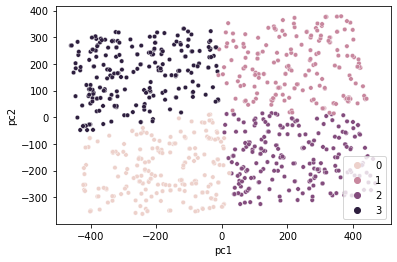

In [37]:
visualize_clusters('clusters')

In [38]:
clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(df)
    clustering_score.append(kmeans.inertia_) 


  

In [39]:
clustering_score

[100960056.65319866,
 56580338.87644124,
 38959902.52947159,
 28721823.03772891,
 24240879.051755037,
 20651123.571939554,
 18403648.910725202,
 16525932.486521391,
 14895929.97503337,
 13778114.014984917]

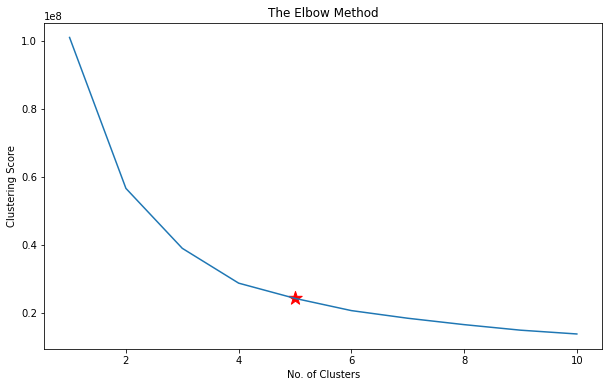

In [40]:

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score)
plt.scatter(5,clustering_score[4], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()